In [1]:
#installing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
#models
from sklearn.linear_model import LinearRegression, LogisticRegression
#metrics

from sklearn.ensemble import RandomForestClassifier

In [2]:
#reading the data
train_data=pd.read_csv(r"C:\Users\thoka\Desktop\Bank-Marketing\Datasets\trainset.csv")

In [3]:
#after analysing using the visualization removing columns that may not be useful
train_data.drop(columns=["job", "education","marital", "contact", "month", "day_of_week","pdays","campaign","poutcome"],inplace=True)


In [7]:
train_data.head()

,age,housing,loan,duration,poutcome,Subscribed
0,41,yes,no,1575,nonexistent,yes
1,49,yes,no,1042,nonexistent,yes
2,49,no,no,1467,nonexistent,yes
3,41,yes,no,579,nonexistent,yes
4,45,yes,no,461,nonexistent,yes


In [9]:
#converting categories into numerics 
train_data["housing"]=train_data["housing"].astype("category")
train_data["housing"]=train_data["housing"].cat.codes

train_data["loan"]=train_data["loan"].astype("category")
train_data["loan"]=train_data["loan"].cat.codes

train_data["Subscribed"]=train_data["Subscribed"].astype("category")
train_data["Subscribed"]=train_data["Subscribed"].cat.codes

train_data["poutcome"]=train_data["poutcome"].astype("category")
train_data["poutcome"]=train_data["poutcome"].cat.codes




In [11]:
train_data.tail()

,age,housing,loan,duration,poutcome,Subscribed
29266,49,0,0,288,0,0
29267,34,1,1,114,1,0
29268,29,0,0,161,1,0
29269,57,0,2,150,1,0
29270,45,2,0,120,1,0


<Axes: >

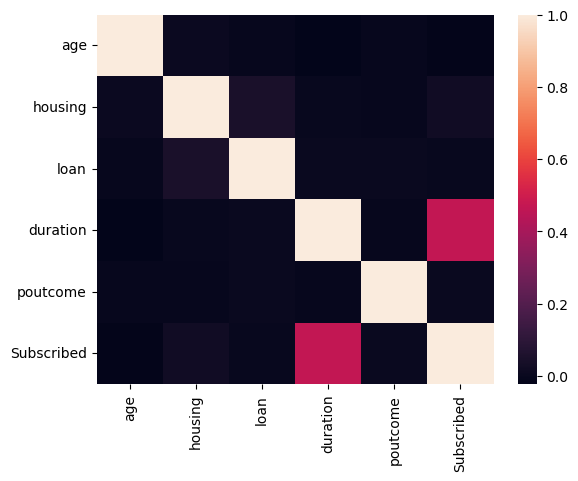

In [13]:
sb.heatmap(train_data.corr())

In [15]:
train_data.isnull().sum()

age           0
housing       0
loan          0
duration      0
poutcome      0
Subscribed    0
dtype: int64

In [17]:
train_data.columns

Index(['age', 'housing', 'loan', 'duration', 'poutcome', 'Subscribed'], dtype='object')

In [19]:

train_data.head()

,age,housing,loan,duration,poutcome,Subscribed
0,41,2,0,1575,1,1
1,49,2,0,1042,1,1
2,49,0,0,1467,1,1
3,41,2,0,579,1,1
4,45,2,0,461,1,1


In [21]:
train_data.describe()

,age,housing,loan,duration,poutcome,Subscribed
count,29271.000000,29271.000000,29271.000000,29271.000000,29271.000000,29271.000000
mean,40.126132,1.039903,0.325612,266.334973,0.977520,0.109187
std,9.522742,0.986956,0.721707,272.826726,0.205926,0.311878
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,0.000000,103.000000,1.000000,0.000000
50%,39.000000,2.000000,0.000000,179.000000,1.000000,0.000000
75%,47.000000,2.000000,0.000000,327.000000,1.000000,0.000000
max,88.000000,2.000000,2.000000,4918.000000,2.000000,1.000000


In [23]:
train_data.isnull().sum()

age           0
housing       0
loan          0
duration      0
poutcome      0
Subscribed    0
dtype: int64

In [25]:
x= train_data.drop(columns="Subscribed")

In [27]:
y=train_data["Subscribed"]

In [29]:
from sklearn.model_selection import train_test_split

In [127]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [129]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [131]:
x_train

,age,housing,loan,duration,poutcome
17916,37,0,2,354,1
17454,31,2,0,325,1
9146,39,0,0,56,1
27963,35,2,0,273,1
22769,46,0,0,246,1
...,...,...,...,...,...
23992,31,0,2,90,1
27640,55,0,0,123,0
14501,45,0,0,12,1
14555,46,2,0,14,1


In [133]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [135]:
x_train_scaled

array([[-0.33036493, -1.05579709,  2.33898192,  0.3216068 ,  0.10501738],
       [-0.96294776,  0.97054608, -0.44750531,  0.21546633,  0.10501738],
       [-0.11950399, -1.05579709, -0.44750531, -0.76907803,  0.10501738],
       ...,
       [ 0.51307884, -1.05579709, -0.44750531, -0.93011875,  0.10501738],
       [ 0.61850931,  0.97054608, -0.44750531, -0.92279871,  0.10501738],
       [-0.85751729, -1.05579709, -0.44750531, -0.54581704,  0.10501738]])

In [137]:
x_test_scaled

array([[-0.43579541, -1.05579709, -0.44750531, -0.71417779,  0.10501738],
       [-1.27923918,  0.97054608, -0.44750531,  1.26223097,  0.10501738],
       [ 0.72393978, -1.05579709, -0.44750531, -0.01511469,  0.10501738],
       ...,
       [ 1.35652261, -1.05579709, -0.44750531, -0.71051777,  0.10501738],
       [ 3.04341016,  0.97054608, -0.44750531,  1.28053105,  0.10501738],
       [-0.96294776, -1.05579709, -0.44750531, -0.24935573,  0.10501738]])

In [139]:
log_reg=LogisticRegression(random_state=0).fit(x_train_scaled,y_train)

In [141]:
log_reg.predict(x_train_scaled)

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [143]:
log_reg.score(x_train_scaled,y_train)

0.9032651666748012

In [145]:
log_reg.score(x_test_scaled,y_test)

0.9007059895240264

In [147]:
rf=RandomForestClassifier(n_estimators=200,max_depth=7,random_state=42).fit(x_train_scaled,y_train)

In [148]:
rf.score(x_test_scaled,y_test)

0.9166476884536552